# Regression

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from tabulate import tabulate
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.datasets import fetch_openml, fetch_california_housing
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [85]:
california = fetch_california_housing()

In [87]:
df = pd.DataFrame(data = california.data, columns = california.feature_names)
df['MedHouseval'] = pd.Series(california.target, name='MedHouseval')

In [89]:
df = df.apply(pd.to_numeric, errors='coerce')
df = df.dropna()

In [91]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseval
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [93]:
X = df.drop('MedHouseval', axis=1)
y = df['MedHouseval']

In [95]:
#test data size = 0.1
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.1, random_state=42)

In [97]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [99]:
y_pred = model.predict(X_test)

In [101]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f"Mean absolute Error: {mae}")
print(f"Mean squared error: {mse}")
print(f"R2 Score: {r2}")

Mean absolute Error: 0.542397278228391
Mean squared error: 0.5590019245025631
R2 Score: 0.5808353312067694


In [103]:
#Test size=0.2
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)


In [105]:
model=LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [107]:
y_pred = model.predict(X_test)

In [109]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f'MAE: {mae}')
print(f'MSE:{mse}')
print(f'R2 Score: {r2}')

MAE: 0.5332001304956556
MSE:0.5558915986952442
R2 Score: 0.575787706032451


In [111]:
#Adding More Statical Analysis

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseval
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [113]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseval
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [115]:
correlation_matrix = df.corr()
correlation_matrix['MedHouseval'].sort_values(ascending=False)

MedHouseval    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseval, dtype: float64

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseval  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


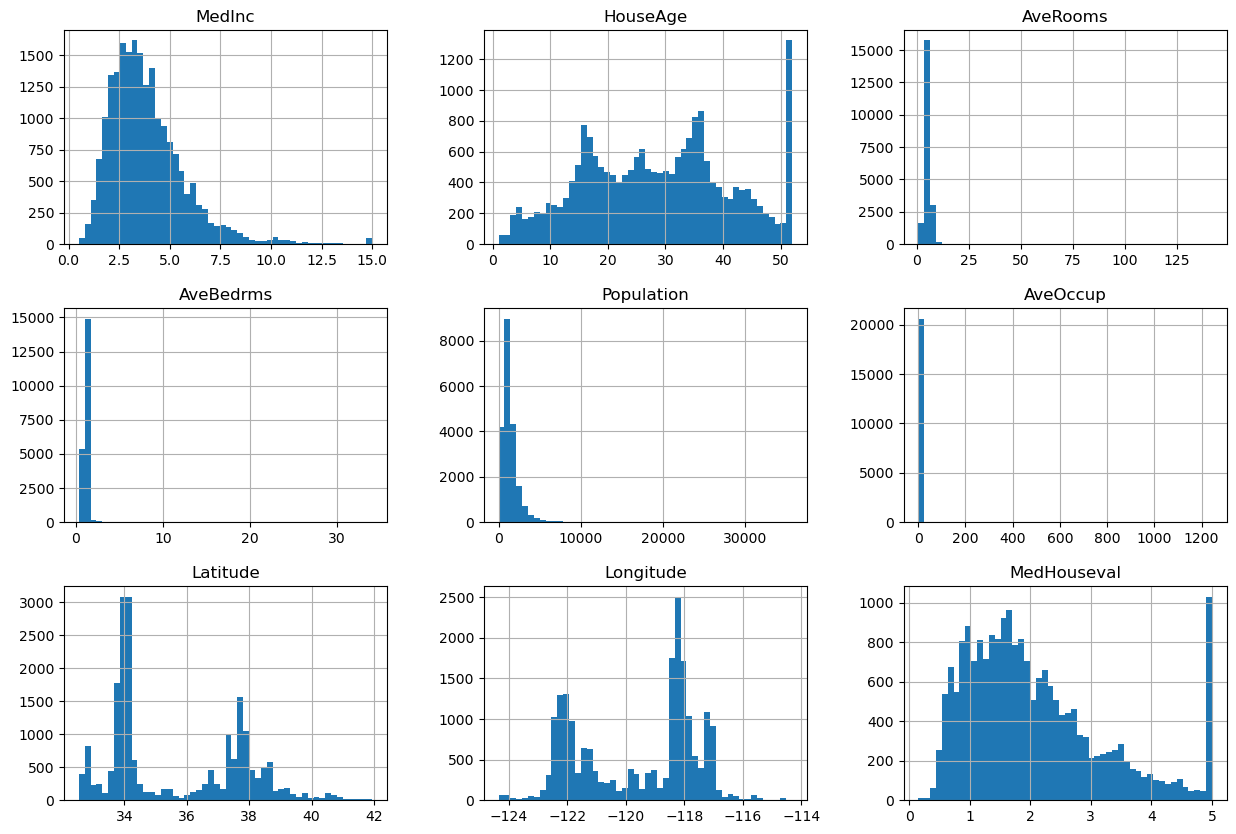

In [119]:
df.hist(bins=50, figsize=(15, 10))
plt.show()

In [120]:
print("Missing values in Dataset:\n", df.isnull().sum())

Missing values in Dataset:
 MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseval    0
dtype: int64


In [123]:
column = 'MedHouseval'
skewness = df[column].skew()
kurtosis = df[column].kurt()
print("Skewness", skewness, "\nKurtosis", kurtosis)

Skewness 0.9777632739098345 
Kurtosis 0.3278702429465876


# Classification